In [1]:
import pandas as pd

In [2]:

table = pd.read_csv('heart.csv')

# getting data on cholesterol and age of the patients
table_features = table[["chol", "age"]]

#getting the target column (just 1 or 0 for now)
table_target = table["target"]

In [3]:

import numpy as np

In [4]:
# getting the tagrets column with 1s and -1s
targets = np.where(np.array(table_target) == 0, -1, 1)



In [5]:
# getting the features matrix
features_mat = np.array(table_features).astype("float64") 

# feature scaling
features_mat[:, 0] = (features_mat[:, 0] - features_mat[:, 0].mean()) / features_mat[:, 0].std()
features_mat[:, 1] = (features_mat[:, 1] - features_mat[:, 1].mean()) / features_mat[:, 1].std()

In [6]:
# shuffling the data set
shuffled_indexes = np.random.RandomState(7).permutation(len(targets))

targets = targets[shuffled_indexes]
features_mat = features_mat[shuffled_indexes]

In [7]:
# importing matplotlib library
import matplotlib.pyplot as plt

%matplotlib inline

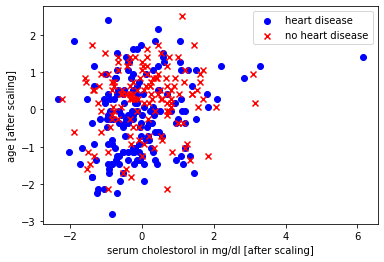

In [8]:
# taking a look at the data points
plt.scatter(features_mat[targets == 1][:, 0], features_mat[targets == 1][:, 1], color="blue", marker='o', label="heart disease")
plt.scatter(features_mat[targets == -1][:, 0], features_mat[targets == -1][:, 1], color="red", marker='x', label="no heart disease")

plt.xlabel("serum cholestorol in mg/dl [after scaling]")
plt.ylabel("age [after scaling]")
plt.legend()

In [9]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
  
    markers = ('o', 'x', 'o', '^', 'v')
    colors = ('blue', 'red', 'lightgreen', 'gray', 'cyan') 
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution)) 
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap) 
    plt.xlim(xx1.min(), xx1.max()) 
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1], 
                    alpha=0.8, c=colors[np.where(cl == 1, 0, 1)], 
                    marker=markers[np.where(cl == 1, 0, 1)], 
                    label=np.where(cl == 1, "heart disease", "no heart disease"), 
                    edgecolor='black')

In [10]:
import numpy as np

class Adaline_SGD:
    
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return
    
    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
    
   
    def count_misclassifications(self, test_examples, true_targets):
        predicted_targets = self.predict(test_examples)
        
        count = 0
        for prediction, true_value in zip(predicted_targets, true_targets):
            if (prediction != true_value):
                count += 1
                
        return count


In [11]:
# creating the adalines
heart_ads = Adaline_SGD(eta=0.001, n_iter=50, random_state=3)

In [12]:
# adalines learning 

## stochastic
heart_ads.fit(features_mat, targets)

Text(0.5, 1.0, 'Adaline with stochastic gradient descent -> eta = 0.001')

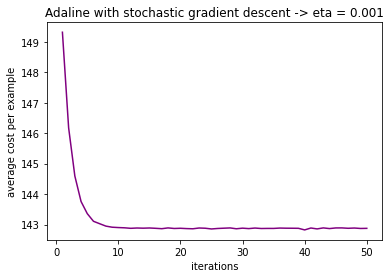

In [13]:
# the cost at each epoch for stochastic gradient descent adaline
plt.plot(range(1, heart_ads.n_iter + 1), np.array(heart_ads.cost_) * len(targets), color="purple")



plt.xlabel("iterations")
plt.ylabel("average cost per example")
plt.title("Adaline with stochastic gradient descent -> eta = 0.001")

Text(0.5, 1.0, 'Adaline with stochastic gradient descent -> eta = 0.0005')

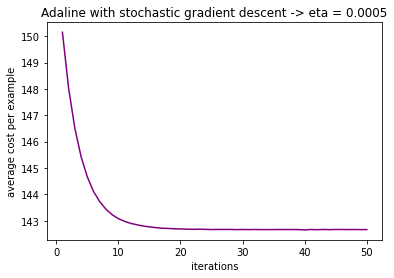

In [14]:
# the cost at each iteration/epoch for stochastic gradient descent adaline (eta = 0.0005)

heart_ads.eta = 0.0005 # changing the learning rate
heart_ads.fit(features_mat, targets)

plt.plot(range(1, heart_ads.n_iter + 1), np.array(heart_ads.cost_) * len(targets), color="purple")


plt.xlabel("iterations")
plt.ylabel("average cost per example")
plt.title("Adaline with stochastic gradient descent -> eta = 0.0005")

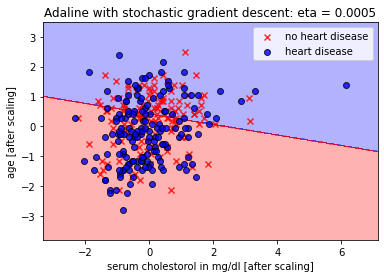

Percentage Misclassified:
38.6%


In [15]:
#plotting the final decision region for stochastic descent model
plot_decision_regions(features_mat, targets, classifier=heart_ads) 

plt.xlabel("serum cholestorol in mg/dl [after scaling]")
plt.ylabel("age [after scaling]")
plt.legend()
plt.title("Adaline with stochastic gradient descent: eta = 0.0005")
plt.show()

print("Percentage Misclassified:")

num_misclass_stoc = heart_ads.count_misclassifications(features_mat, targets)

print(round(num_misclass_stoc * 100 / targets.size, 1), "%", sep='')


#References
1. https://vitalflux.com/adaline-explained-with-python-example/
2. https://dzone.com/articles/adaline-explained-with-python-example-data-analyti
3. https://pabloinsente.github.io/the-adaline
4. https://dzone.com/articles/perceptron-explained-using-python-example-data-ana
5. https://towardsdatascience.com/understanding-basic-machine-learning-with-python-perceptrons-and-artificial-neurons-dfae8fe61700